# DIABOLO


#  LECTURE DES DONNES

In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
#from  pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)

import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from treeinterpreter import treeinterpreter as ti
from matplotlib import pyplot as plt
import seaborn as sns
from itertools import *

import graphviz as gv

import pydotplus
import io
from scipy import misc


                   
Location_csv = 'd:\diabolo_1.csv'
xnames=['ALLURE'
        ,'CO_DISTANCE',
        'CO_PRIX',
        'IDCOURSE',
        'IDPARTCIPANT',
        'PAR_ARRIVE',
        'PAR_CARRIERE',
        'PAR_CARRIERE_Q' ,
        'PAR_CLASSE_AGE',
        'PAR_COTEDER',
        'PAR_ENT_ECART_GAGNANT',
        'PAR_ENT_RAPPORT_GAGNANT_M',
        'PAR_ENT_REU_PLACE',
        'PAR_ENT_REUSSITE_GAGNE',
        'PAR_ENT_VICTOIRE',
        'PAR_GAIN',
        'pAR_JOC_ECART_GAGNANT',
        'PAR_JOC_ECART_PLACE',
        'PAR_JOC_NB_COURSE',
        'PAR_JOC_PLACE_3P',
        'pAR_JOC_RAPPORT_GAGNANT_M',
        'PAR_JOC_REU_PLACE',
        'pAR_JOC_REUSSITE_GAGNE',
        'pAR_JOC_VICTOIRE',
        'PAR_NP',
        'PAR_NUM',
        'PAR_PLACE',
        'PAR_PLACE_Q',
        'PAR_REUSSITE_3P',
        'PAR_REUSSITE_GAGNE',
        'PAR_REUSSITE_QUINTE',
        'PAR_RUESSITE_PLACE',
        'autostart',
        'cendre',
        'grande_piste',
        'Point',
        'FIN_ligne']


df=pd.read_csv (Location_csv, sep=';',names=xnames,skipinitialspace=True,encoding='Latin-1')

df=df.groupby('ALLURE')     
df=df.get_group(1) 

#Suppression de la collone TROT
df.drop(["ALLURE"], axis=1, inplace=True)

#Suppression de la collone TROT
df.drop(["FIN_ligne"], axis=1, inplace=True)

#Suppression de la collone TROT
df.drop(["IDPARTCIPANT"], axis=1, inplace=True)

#Suppression de la collone TROT
df.drop(["PAR_NP"], axis=1, inplace=True)

#Suppression de la collone TROT
df.drop(["PAR_COTEDER"], axis=1, inplace=True)


#Suppression de la collone TROT
df.drop(["cendre"], axis=1, inplace=True)

#Suppression de la collone TROT
df.drop(["IDCOURSE"], axis=1, inplace=True)


df.drop(["CO_DISTANCE"], axis=1, inplace=True)

#Suppression de la collone TROT
##df.drop(["autostart"], axis=1, inplace=True)



#Suppression de la collone TROT
df.drop(["grande_piste"], axis=1, inplace=True)

#xnames=['CO_DISTANCE','CO_NB','CO_PRIX','HIPPO','IDCOURSE','PAR_age','PAR_ARRIVE',
#'PAR_CARRIERE','PAR_CARRIERE_Q','PAR_CLASSE_AGE','PAR_CORDE','PAR_COTEDER','PAR_ENT_ECART_GAGNANT','PAR_ENT_RAPPORT_GAGNANT_M',
#'PAR_ENT_RAPPORT_GANGANT','PAR_ENT_REU_PLACE','PAR_ENT_REUSSITE_GAGNE','PAR_ENT_VICTOIRE','PAR_GAIN','pAR_JOC_ECART_GAGNANT',
#'PAR_JOC_ECART_PLACE','PAR_JOC_NB_COURSE','PAR_JOC_PLACE_3P','pAR_JOC_RAPPORT_GAGNANT_M','PAR_JOC_REU_PLACE','pAR_JOC_REUSSITE_GAGNE',
#'pAR_JOC_VICTOIRE','PAR_NP','PAR_PLACE','PAR_PLACE_Q','PAR_REUSSITE_3P','PAR_REUSSITE_GAGNE','PAR_REUSSITE_QUINTE','PAR_RUESSITE_PLACE','autostart','cendre','grande_piste','sable_fibre','dirt']
   
#Transformer une colonne en un index dans un dataframe
#df = df.set_index('IDPARTCIPANT')

#affichage des premiere lignes du jeu de données
df.head()



,CO_PRIX,PAR_ARRIVE,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_ENT_ECART_GAGNANT,PAR_ENT_RAPPORT_GAGNANT_M,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,PAR_ENT_VICTOIRE,...,pAR_JOC_VICTOIRE,PAR_NUM,PAR_PLACE,PAR_PLACE_Q,PAR_REUSSITE_3P,PAR_REUSSITE_GAGNE,PAR_REUSSITE_QUINTE,PAR_RUESSITE_PLACE,autostart,Point
9,90000,99,41,5,44456,6,8.96,0.21,0.06,9,...,89,1,7,0,0.292683,0.121951,0.00000,0.170732,1,154
10,90000,4,58,3,34229,41,6.85,0.12,0.04,6,...,139,2,14,2,0.396552,0.155172,0.00000,0.241379,1,216
11,90000,2,41,9,40630,0,8.72,0.27,0.10,21,...,220,3,11,4,0.585366,0.317073,0.04878,0.268293,1,254
12,90000,1,64,2,39671,0,0.00,0.20,0.00,0,...,69,4,18,0,0.500000,0.218750,0.03125,0.281250,1,183
13,90000,99,10,1,48270,0,3.33,0.46,0.21,80,...,50,5,2,0,0.800000,0.600000,0.00000,0.200000,1,212


La normalisation des ensembles de données est une exigence courante pour de nombreux estimateurs d'apprentissage automatique mis en œuvre dans scikit-learn; 
ils peuvent se comporter mal 
si les caractéristiques individuelles ne ressemblent pas plus ou moins à des données standard normalement distribuées: gaussiennes avec une moyenne nulle et une variance unitaire .

# CORRELATION DES DONNEES

In [2]:
# trvail sur les courses de trot (allure=1)
# dimensions

print(df.shape) # lignes = observations
print(df.dtypes) # lignes = observations


(201238, 28)
CO_PRIX                        int64
PAR_ARRIVE                     int64
PAR_CARRIERE                   int64
PAR_CARRIERE_Q                 int64
PAR_CLASSE_AGE                 int64
PAR_ENT_ECART_GAGNANT          int64
PAR_ENT_RAPPORT_GAGNANT_M    float64
PAR_ENT_REU_PLACE            float64
PAR_ENT_REUSSITE_GAGNE       float64
PAR_ENT_VICTOIRE               int64
PAR_GAIN                     float64
pAR_JOC_ECART_GAGNANT          int64
PAR_JOC_ECART_PLACE            int64
PAR_JOC_NB_COURSE              int64
PAR_JOC_PLACE_3P               int64
pAR_JOC_RAPPORT_GAGNANT_M    float64
PAR_JOC_REU_PLACE            float64
pAR_JOC_REUSSITE_GAGNE       float64
pAR_JOC_VICTOIRE               int64
PAR_NUM                        int64
PAR_PLACE                      int64
PAR_PLACE_Q                    int64
PAR_REUSSITE_3P              float64
PAR_REUSSITE_GAGNE           float64
PAR_REUSSITE_QUINTE          float64
PAR_RUESSITE_PLACE           float64
autostart                

L’analyse univariée permet d’explorer une seule feature à la fois. 
Cette analyse se base sur les statistiques descriptives.
Ces dernières permettent de tirer des indications concises sur une feature donnée.
Parmi ces indicateurs, on retrouve la moyenne, la médiane ainsi que les mesures de dispersion de données.

Petite exploration dur la variable PAR_REUSSITE_3P

VARIANCE : 
indique de quelle manière la série de données d’une feature se disperse autour de la moyenne. Une variance élevée indique que les valeurs sont très écartées les unes des autres et vice versa.

écart type : 
L’écart type est aussi une mesure de dispersion des données. Il est tout simplement la racine carrée de la variance. On utilise souvent l’écart type que la variance pour mieux appréhender le degré de dispersion des données.

In [3]:
def explo_variable(DATA):

     # On calcule le quantile 0,25 qui est le quartile Q1
    mediane = np.median(DATA)
    svariable=DATA.name
    
    print ("La mediane              "+svariable+"    : ", round(mediane, 2))

    maxx = np.max(DATA)
    print ("Le max              "+svariable+"    : ", round(maxx, 2))
    
    minn = np.min(DATA)
    print ("Le min              "+svariable+"    : ", round(minn, 2))
    
    moy = np.mean(DATA)
    print ("La moyenne               "+svariable+"   : ", round(moy, 2))

    variance = np.var(DATA)
    print ("La variance est          "+svariable+"   : ", round(variance, 2))
    
    ecartType = np.std(DATA)
    print ("Le ecart type            "+svariable+"   : ", round(ecartType, 2))
     
    print("")      
    
    #print(dataset.describe())
    
    print("")    
    

    
    
    

In [4]:
def explo_variable2(DATA1, DATA2):

    
    explo_variable(DATA1)
    explo_variable(DATA2)


# TYPAGE du DATAFRAME AVEC ARRIVE

# DF_GAGNANT

In [5]:
#gagnant
#sélection des chevaux dans les 5 premiers


df_gagnant = df
# les lignes sans GAIN sont éliminées
df_gagnant=df_gagnant[df_gagnant.PAR_GAIN >0] # On garde les lignes avec GAIN
#les lignes sans arrivée n'apporte rien
df_gagnant=df_gagnant[df_gagnant.PAR_ARRIVE>0] # On garde la ligne qui possede information arrivée
# trvail sur les courses de trot (allure=1)
print(df_gagnant.shape) # description de l'ensemble


(169442, 28)


# VOUMETRIE : 170 000 LIGNES ENVIRON

# 28  collones ...... (FEATURES = NB COLONNE - 1 )

In [6]:



COLUM=df_gagnant.columns
COLUM



Index(['CO_PRIX', 'PAR_ARRIVE', 'PAR_CARRIERE', 'PAR_CARRIERE_Q',
       'PAR_CLASSE_AGE', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE',
       'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_NUM', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P',
       'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE',
       'autostart', 'Point'],
      dtype='object')

# CORRELATION DES DONNEE AVEC CHEVAUX PARMI LES 3 PREMIERS

In [7]:

df_gagnant['SELECTION'] = (df_gagnant.PAR_ARRIVE<=3).astype(int)
#Suppression de la colonne PAR_ARRIVE

#Suppression de la PAR_ARRIVE
# Elle ne sert plus
df_gagnant.drop(["PAR_ARRIVE"], axis=1, inplace=True)


In [8]:
#Enfin, quelque chose de vraiment cool que vous pouvez mettre 

#dans une carte de chaleur est une matrice de corrélation. 
#Pandas DataFrame a une méthode corr qui calcule le coefficient de corrélation de Pearson (peut être un autre)
#entre tous les couples de colonnes numériques du DataFrame.
# On va analyser les données des DATA pour les valeurs qui ont SELECTION<=3

fig2, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_gagnant.corr(), annot=True, fmt=".2f", linewidths=0.5, ax=ax)



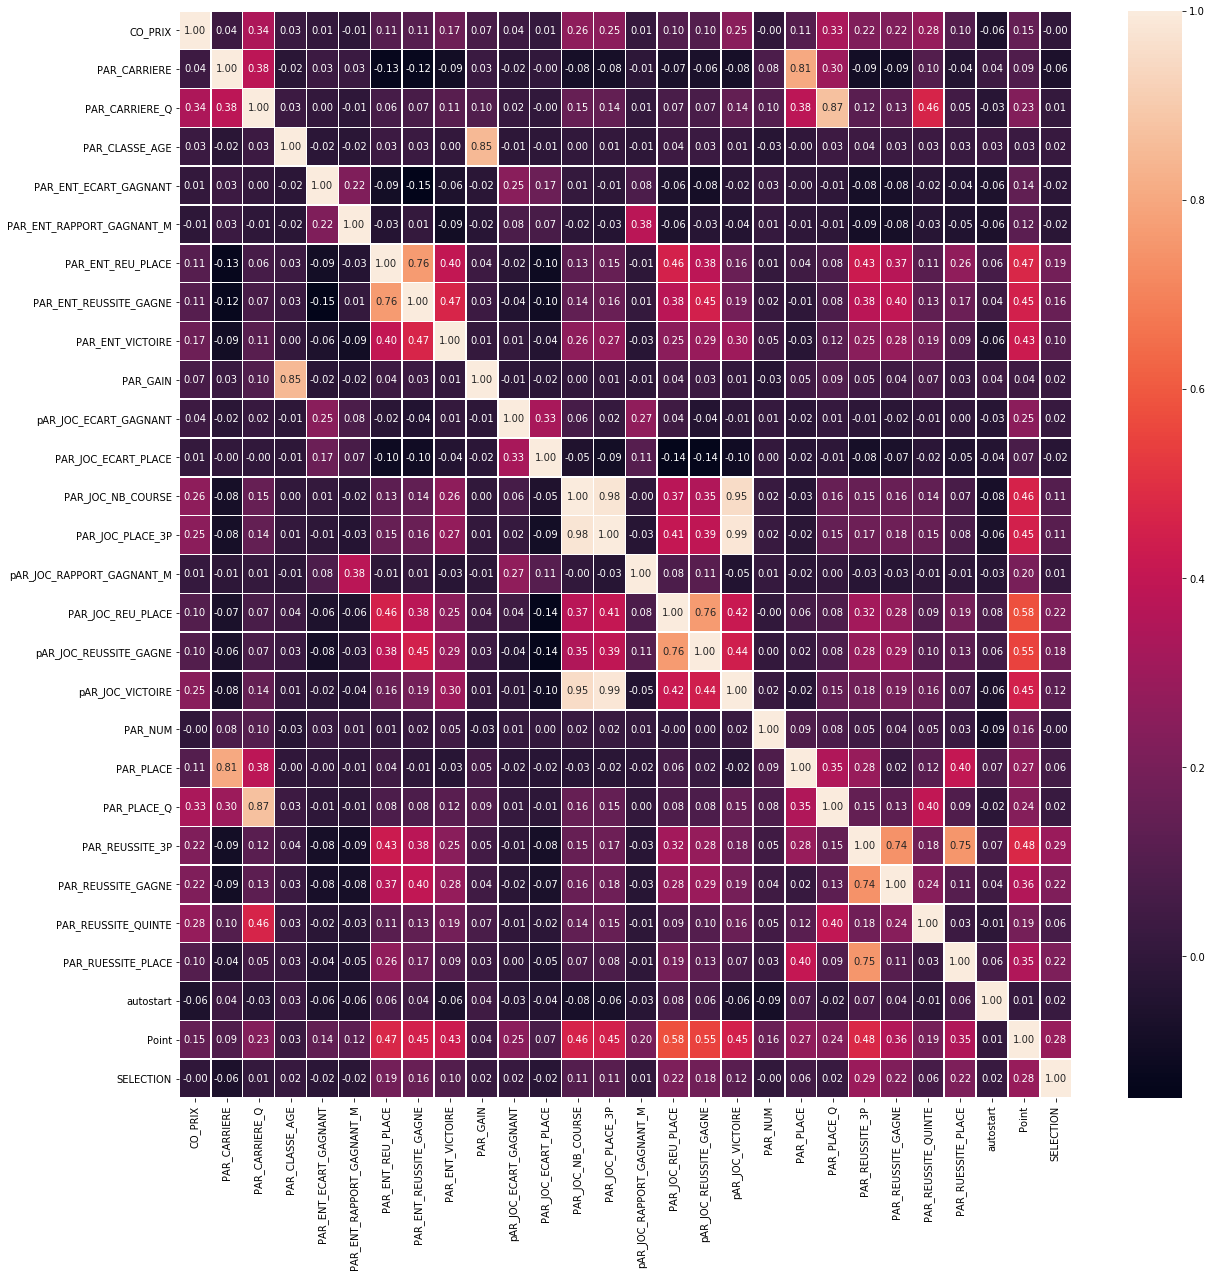

In [9]:
plt.show()

# Les plus forte correlations avec SELECTION sont :

 PAR_REUSSITE_3P
 Point
 PAR_JOC_REU_PLACE


PAR_REUSSITE_GAGNE
PAR_ENT_REU_PLACE
PAR_JOC_REUSSITE_GAGNE
PAR_ENT_REUSSITE_GAGNE
PAR_JOC_NB_COURSE
PAR_JOC_PLACE_3P
PAR_JOC_VICTOIRE
PAR_ENT_VICTOIRE







In [10]:

COLUM=df_gagnant.columns
print(COLUM)
print(df_gagnant.shape) # description de l'ensemble


Index(['CO_PRIX', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE',
       'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE',
       'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_NUM', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P',
       'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE',
       'autostart', 'Point', 'SELECTION'],
      dtype='object')
(169442, 28)


In [11]:
Lib_features = list(df_gagnant.columns[:27]) # Liebllé des variable DATA

print(Lib_features)
lib_cible =  "SELECTION" # libellé de la variable CIBLE

#print(df_gagnant[lib_cible])


['CO_PRIX', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M', 'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE', 'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE', 'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M', 'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE', 'PAR_NUM', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'autostart', 'Point']


In [12]:
#def explo_variable(dataset, svariable, schamp):

#  SEPARATION DES DONNEES

# Training et Test

In [13]:
 from sklearn.model_selection  import  train_test_split 
    
train, test=train_test_split(df_gagnant, test_size=0.15) 

print("training size : {}; Test size {}".format(len(train), len(test)))
      

training size : 144025; Test size 25417


In [14]:
my_Features=["PAR_REUSSITE_3P","Point","PAR_JOC_REU_PLACE","PAR_REUSSITE_GAGNE","PAR_ENT_REU_PLACE",
    "pAR_JOC_REUSSITE_GAGNE","PAR_ENT_REUSSITE_GAGNE","PAR_JOC_NB_COURSE","PAR_JOC_PLACE_3P","pAR_JOC_VICTOIRE",
             "PAR_ENT_VICTOIRE"]
##my_Features=["PAR_REUSSITE_3P","Point","PAR_JOC_REU_PLACE","PAR_REUSSITE_GAGNE","PAR_ENT_REU_PLACE","PAR_ENT_VICTOIRE"]
my_Features=Lib_features

 # ESTIMATEUR  :  arbre avec classification
 
 Les arbres binaires de décision (CART : classification and regression trees)
s’appliquent à tous types de variables. Les options de l’algorithme sont dé-
crites dans la documentation. La complexité du modèle est gérée par deux paramètres
: max_depth, qui détermine le nombre max de feuilles dans l’arbre,
et le nombre minimales min_samples_split d’observations requises pour
rechercher une dichotomie.


In [15]:
#c=DecisionTreeClassifier(criterion='gini',splitter='best',max_leaf_nodes=17,min_samples_split=5000)
c=DecisionTreeClassifier(criterion='entropy',splitter='best',max_leaf_nodes=500,min_samples_split=10000)
#c=RandomForestClassifier(n_estimators=500,criterion='gini', 
 #                     max_depth=None,min_samples_split=5000, 
  #                       min_samples_leaf=1,max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=True)


#criterion = La fonction pour mesurer la qualité d'une scission. 
#Les critères supportés sont "gini" pour l'impureté de Gini et "entropy" pour le gain d'information.


# PARAMETRES DE l'ESTIMATEUR

In [16]:

c.get_params()

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 500,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10000,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [17]:
# definition de la training set
#X_train =train[my_Features]
X_train =train[my_Features]
y_train=train["SELECTION"]

# ensemble de test
X_test =test[my_Features]
y_test =test["SELECTION"]

# FIT

In [18]:
dt=c.fit(X_train, y_train)
#CLASSE NAMES
print( c.classes_)

[0 1]


In [19]:
def show_tree(tree, features, path):
    f=io.StringIO()
    my_classe_names = c.classes_
    
    
    export_graphviz(tree, out_file=f, feature_names=my_Features,class_names=["0","1"],filled=1,
                    label="all",impurity=1,proportion=1,rotate=1,rounded=1 )
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=misc.imread(path)
    plt.rcParams["figure.figsize"] = (15,15)
    plt.imshow(img)
    
    

In [20]:
show_tree(dt, my_Features,"d:\diabolo_tree.png")


# PREDICTION

In [21]:
y_pred=c.predict(X_test)
print(y_pred)


[0 1 0 ..., 0 0 0]


In [22]:
print(c.predict_proba(X_test))

[[ 0.91386139  0.08613861]
 [ 0.4916498   0.5083502 ]
 [ 0.84145948  0.15854052]
 ..., 
 [ 0.93253731  0.06746269]
 [ 0.7065168   0.2934832 ]
 [ 0.86677665  0.13322335]]


In [23]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred) * 100


# ESTIMATION

In [25]:
# POURCENTATAGE DE REUSSITE DE L ESTIMATEUR
score

78.699295746941019

In [26]:
# Optimisation du paramètre de complexité du modèle par validation croisée 

In [27]:
#from sklearn.grid_search import GridSearchCV
#param=[{"max_depth":list(range(2,30))}]
#titan_tree= GridSearchCV(DecisionTreeClassifier(),param,cv=5,n_jobs=-1)
#titan_opt=titan_tree.fit(X_train, y_train)
# paramètre optimal
#print(titan_opt.best_params_)

# MATRICE DE CONFUSION

In [28]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Prediction'], margins=True)

# LES ELEMENTS DIAGONAUX INDIQUE UNE BONNE CLASSIFICATION

Prediction,0,1,All
True,,,
0,18938,903,19841
1,4511,1065,5576
All,23449,1968,25417


In [29]:
 # EN POURCENTAGE

In [30]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Prediction']).apply(lambda r: 100.0 * r/r.sum())
# LES ELEMENTS DIAGONAUX INDIQUE UNE BONNE CLASSIFICATION  : avec POURCENTAGE

Prediction,0,1
True,,
0,80.762506,45.884146
1,19.237494,54.115854


# La prediction qu un cheval sera à l arrivé est fiable a   69 %

# La prediction qu un cheval NE sera pas à l arrivé est fiable a 80%


# LECTURE DE LA DECISION ( VOIR GRAPHIQUE AUSSI BIEN SUR)

# IMAGE ASSOCIEE

In [31]:
n_nodes = c.tree_.node_count
children_left = c.tree_.children_left
children_right = c.tree_.children_right
feature = c.tree_.feature
threshold = c.tree_.threshold

In [32]:
# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

In [33]:
print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))


The binary tree structure has 47 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 26] <= 181.5 else to node 2.
	node=1 test node: go to node 5 if X[:, 21] <= 0.249087497592 else to node 6.
	node=2 test node: go to node 3 if X[:, 21] <= 0.416254520416 else to node 4.
		node=3 test node: go to node 7 if X[:, 26] <= 207.5 else to node 8.
		node=4 test node: go to node 15 if X[:, 21] <= 0.614246487617 else to node 16.
		node=5 test node: go to node 11 if X[:, 26] <= 111.5 else to node 12.
		node=6 test node: go to node 9 if X[:, 15] <= 0.0450000017881 else to node 10.
			node=7 test node: go to node 23 if X[:, 0] <= 23500.0 else to node 24.
			node=8 test node: go to node 19 if X[:, 21] <= 0.285098493099 else to node 20.
			node=9 leaf node.
			node=10 test node: go to node 13 if X[:, 21] <= 0.410045981407 else to node 14.
			node=11 test node: go to node 33 if X[:, 24] <= 0.137176007032 else to node 34.
			node=12 test node: go to node 29 if X[:, 21] <= 0

In [34]:
print()